In [1]:
import torch
import matplotlib.pyplot as plt
import os
import numpy as np
import copy
os.environ["KMP_DUPLICSCORE_LIB_OK"]="TRUE"

In [2]:
results = torch.load('Regression_estimation_results.pt')

In [3]:
nmodel = len(results[0]['names'])
ndist = 6
nsamples = 2
nseed = 100

In [4]:
MAE = torch.zeros((nsamples,nmodel,ndist,nseed))

t = 0
for s in range(nseed):
    for n in range(nsamples):
        for d in range(ndist):
            MAE[n,:,d,s] = (results[t]['Coeffs'] - results[t]['Coeffs'][...,0][...,-1]).abs().view((nmodel,))
            t += 1

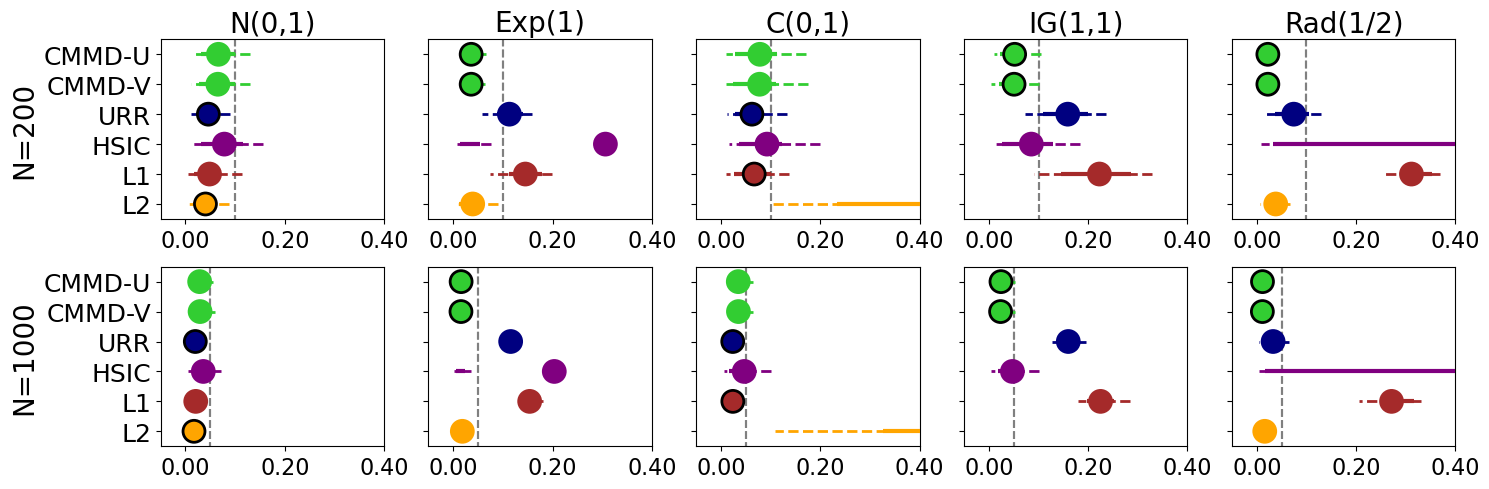

In [5]:
"""
Scatter plot
"""

model_select = [0,1,2,3,4,5]
sample_select = [0,1]
dist_select = [0,1,3,4,5]
# constructing results 
names = results[0]['names']
Dataset_names = [r"N=200","N=1000"]
Dist_names = ["N(0,1)",r"Exp(1)",r"C(0,1)",r"IG(1,1)","Rad(1/2)"]
Colours = ["orange","brown","purple","navy","limegreen","limegreen"]
Model_names = []
colours = []
for i in model_select:
    Model_names.append(names[i])
    colours.append(Colours[i]) 

inds = [i+1 for i in range(len(model_select))]
colours_best = colours

quantiles = [0.75,0.9,0.9]
linestyles = ["-", "--","--"]
lws = [3,2,2]

# Creating plots of results
from matplotlib import rcParams, rc_file_defaults
from matplotlib.ticker import FormatStrFormatter

ylabelsize = 18
xlabelsize = 16
rc_file_defaults()
rcParams['xtick.labelsize'] = xlabelsize
rcParams['ytick.labelsize'] = ylabelsize 

fig,axs = plt.subplots(nrows=len(sample_select), ncols = 5, figsize = (15,5))
for i in range(len(sample_select)):
    for k in range(len(dist_select)):
        axs[i,k].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        axs[i,k].set_yticks(inds)
        axs[i,k].set_ylim(0.5,len(inds)+0.5)
        means = MAE[sample_select[i],model_select,dist_select[k]].mean(-1)
        if k == 0:
            axs[i,k].set_yticklabels(np.array(Model_names))
            axs[i,k].set_ylabel(Dataset_names[i], fontsize = 20)
        else:
            axs[i,k].set_yticklabels([""]*len(Model_names))
        if i ==0:
            axs[i,k].set_title(Dist_names[k], fontsize = 20)
        
        cols_best = copy.deepcopy(colours_best)
        sorted_means = means.sort()[0]
        best_two = [torch.where(sorted_means[i] == means)[0][0] for i in range(2)]
        for c in range(len(best_two)):
            cols_best[best_two[c]]= "black"        
        axs[i,k].scatter(means,inds, color = colours, s = 250, label = "median",zorder = 12,edgecolors=cols_best, lw=2)
        for j in range(2):
            upper = np.quantile(MAE[sample_select[i],model_select,dist_select[k]],quantiles[j],(-1))
            lower = np.quantile(MAE[i,model_select,dist_select[k]],1-quantiles[j],(-1))
            axs[i,k].hlines(inds, upper, lower, color=colours, linestyle=linestyles[j], lw=lws[j], 
                          label = "{0}th - {1}th percentiles".format(int(100-quantiles[j]*100), int(quantiles[j]*100)),
                        zorder = 10-3*j)
        axs[0,k].vlines(0.1,0,10, color= "grey", linestyle = "dashed")
        axs[1,k].vlines(0.05,0,10, color= "grey", linestyle = "dashed")
        if sorted_means.max()>0.01:
            axs[i,k].set_xlim(-0.05,0.4)
        else:
            axs[i,k].set_xlim(0,0.15)
#plt.legend(fontsize = 16, loc = (-0.27,-0.5), ncol = 1)
fig.tight_layout() 
fig.savefig("Reg_experiments_box_plot", bbox_inches = "tight")
plt.show()

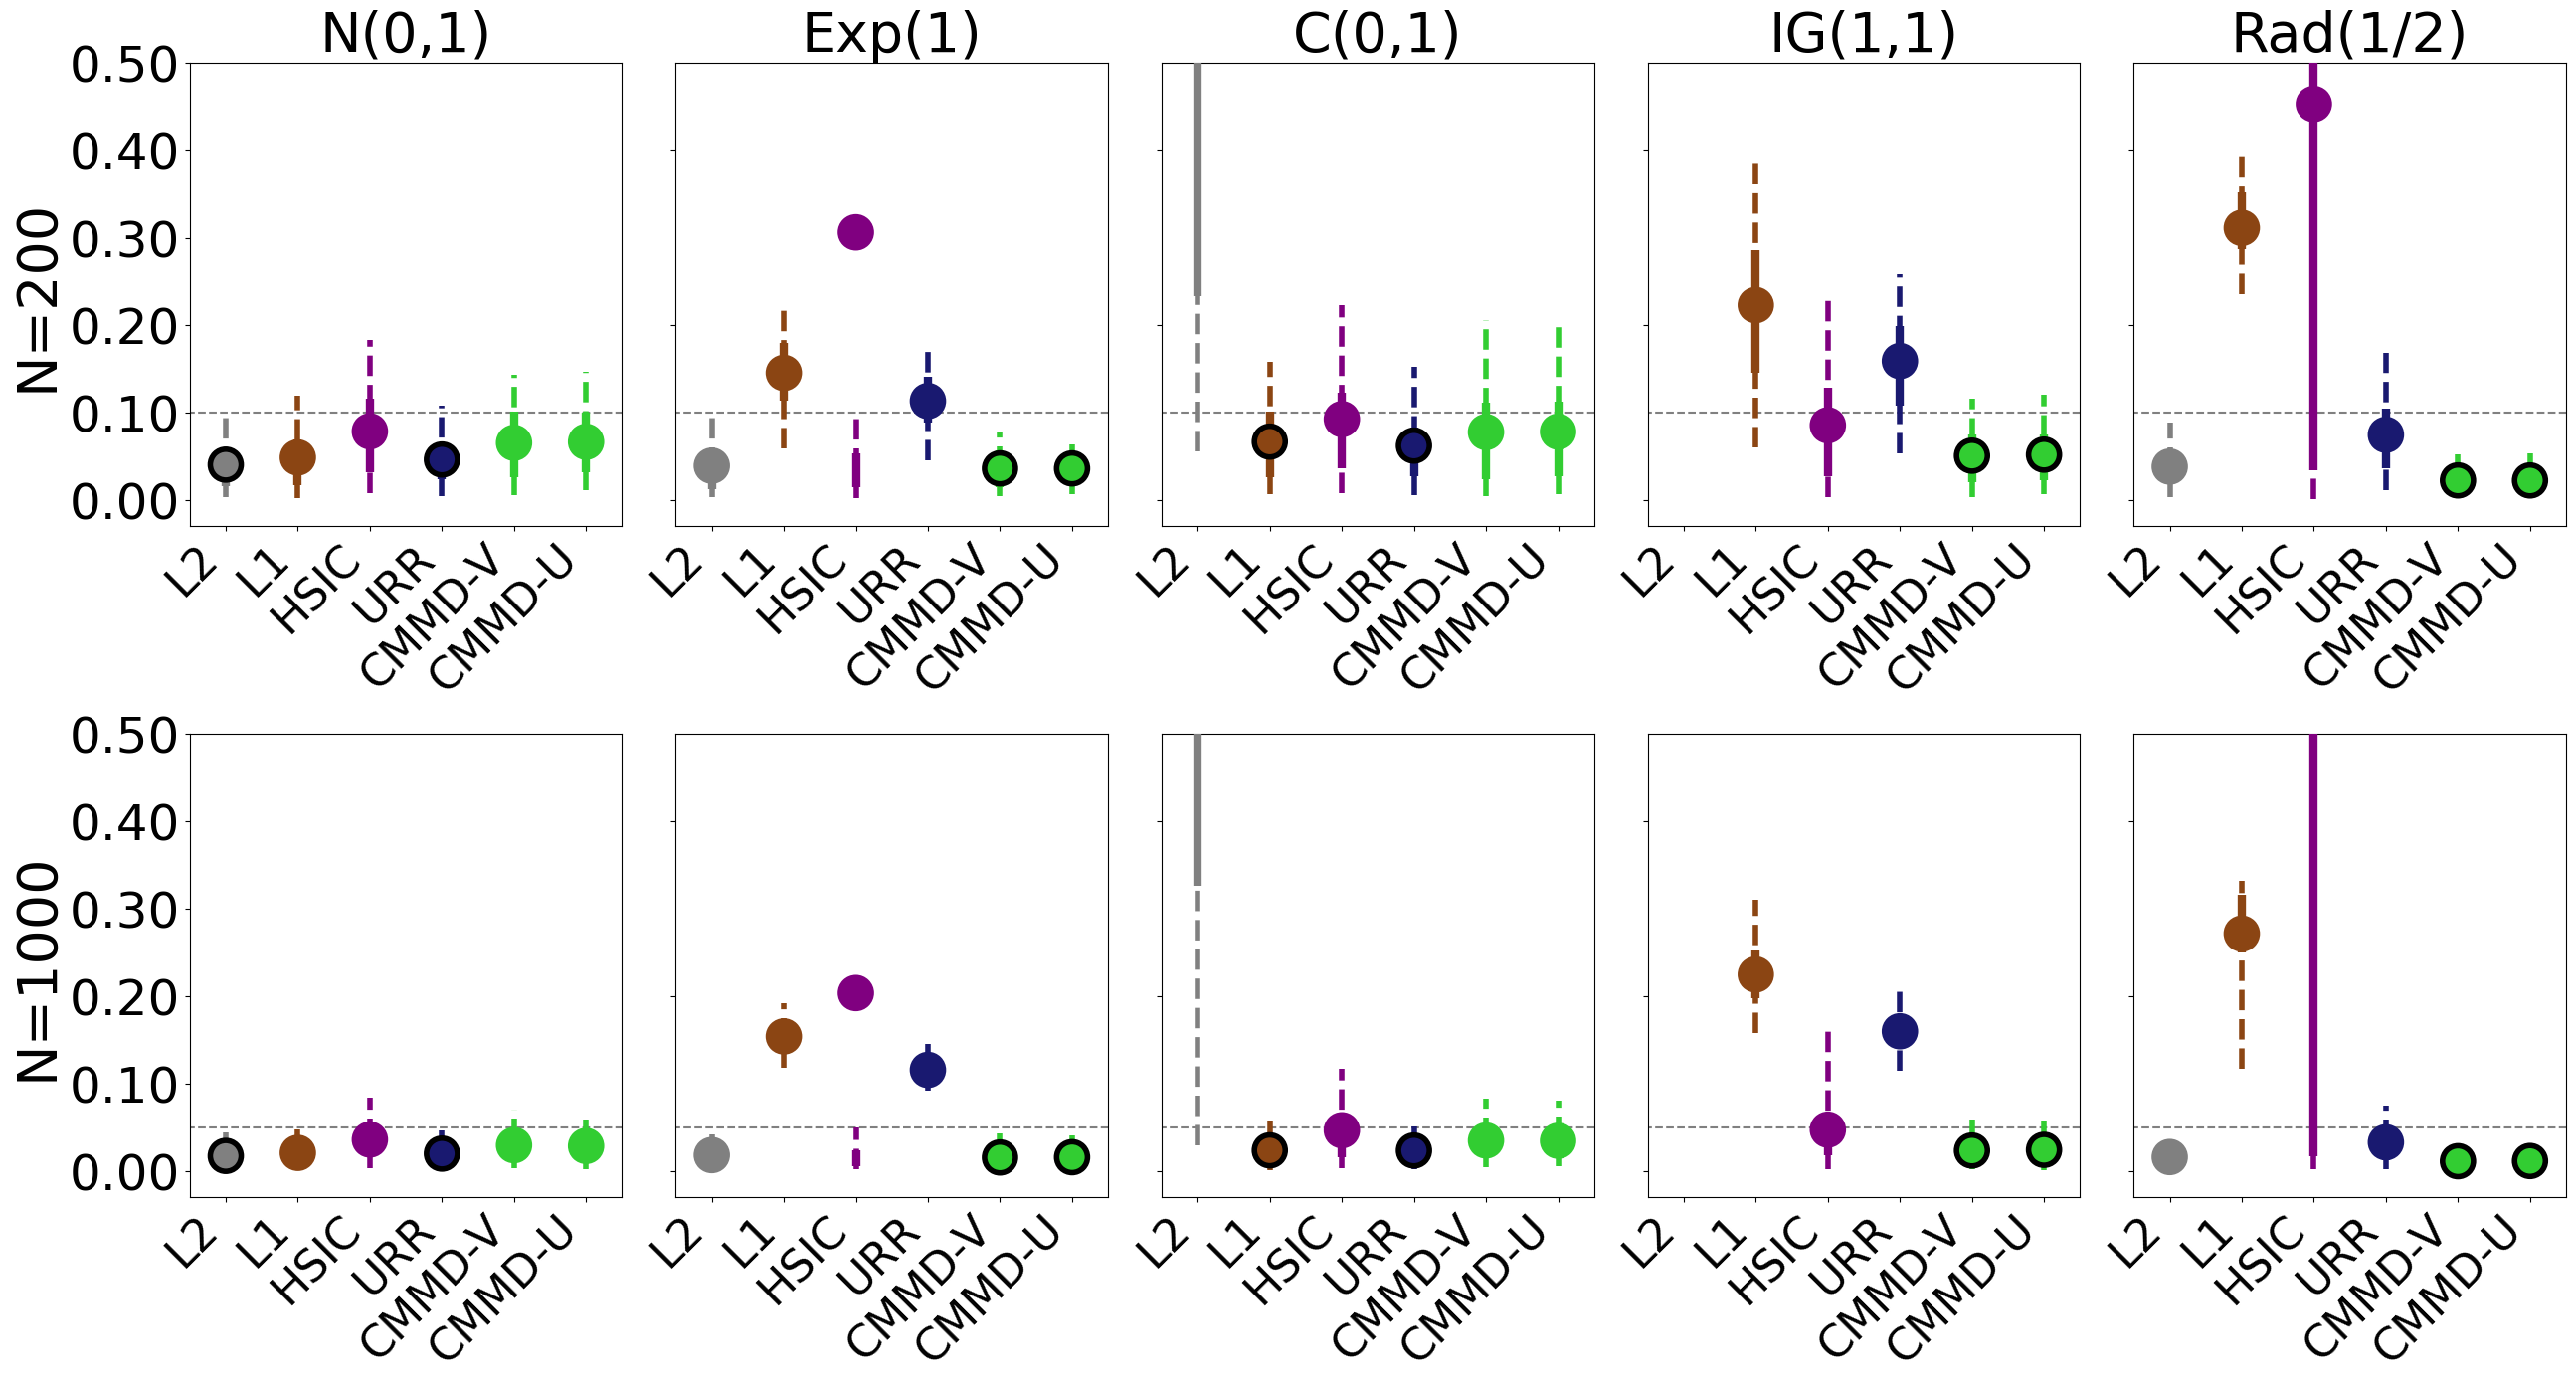

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import copy
from matplotlib.ticker import FormatStrFormatter
from matplotlib import rcParams, rc_file_defaults

# Configuration (doubled font sizes)
ylabelsize = 36   # was 18
xlabelsize = 32   # was 16
rc_file_defaults()
rcParams['xtick.labelsize'] = xlabelsize
rcParams['ytick.labelsize'] = ylabelsize 

# Parameters (Replace with actual data)
model_select = [0, 1, 2, 3, 4, 5]
sample_select = [0, 1]
dist_select = [0, 1, 3, 4, 5]
Dataset_names = [r"N=200", "N=1000"]
Dist_names = ["N(0,1)", r"Exp(1)", r"C(0,1)", r"IG(1,1)", "Rad(1/2)"]
Colours = ["gray", "saddlebrown", "purple", "midnightblue", "limegreen", "limegreen"]
quantiles = [0.75, 0.95, 0.9]
linestyles = ["-", "--", "--"]

# Double line widths: original lws = [3, 2, 2] become:
lws = [6, 4, 4]

# Simulated Results for Testing (Replace with your real data)
Model_names = results[0]['names'][:-1]

# Prepare colors for scatter points
colours_best = Colours

# Create the figure (doubled figure size from (13,7) to (26,14))
fig, axs = plt.subplots(nrows=len(sample_select), ncols=5, figsize=(26, 14))

# Loop through rows and columns of the grid
for i in range(len(sample_select)):
    for k in range(5):  # 5 distributions
        axs[i, k].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        axs[i, k].set_xticks(range(1, len(model_select) + 1))
        axs[i, k].set_xlim(0.5, len(model_select) + 0.5)
        #axs[i, k].set_yscale("log")
        
        # Extract mean and percentiles for the current sample and distribution
        means = MAE[sample_select[i], model_select, dist_select[k]].mean(-1).numpy()
        if k == 0:
            axs[i, k].set_ylabel(Dataset_names[i], fontsize=40)  # was 20
            axs[i, k].set_yticks(np.linspace(0, 0.5, 6))  # Adjust y-ticks
        else:
            axs[i, k].set_yticklabels([])

        if i == 0:
            axs[i, k].set_title(Dist_names[k], fontsize=40)  # was 20

        # Diagonal x-axis labels for models
        axs[i, k].set_xticklabels(Model_names, rotation=45, ha='right')

        # Highlight best-performing models
        cols_best = copy.deepcopy(colours_best)
        sorted_means = np.sort(means)
        best_two = [np.where(means == sorted_means[j])[0][0] for j in range(2)]
        for c in range(len(best_two)):
            cols_best[best_two[c]] = "black"

        # Scatter plot of means (marker size doubled: 150 -> 300, linewidth doubled: 2 -> 4)
        axs[i, k].scatter(range(1, len(model_select) + 1), means, color=Colours, s=500, 
                          zorder=12, edgecolors=cols_best, lw=4)

        # Plot percentile bars (line widths doubled via lws)
        for j in range(2):
            upper = np.quantile(MAE[sample_select[i], model_select, dist_select[k]].numpy(), quantiles[j], axis=-1)
            lower = np.quantile(MAE[sample_select[i], model_select, dist_select[k]].numpy(), 1 - quantiles[j], axis=-1)
            axs[i, k].vlines(range(1, len(model_select) + 1), lower, upper, color=Colours, 
                             linestyle=linestyles[j], lw=lws[j], zorder=10 - 3 * j)
        
        # Dashed threshold lines (optional)
        threshold = 0.1 if i == 0 else 0.05
        axs[i, k].hlines(threshold, 0, len(model_select) + 1, color="grey", linestyle="dashed")

        # Adjust y-axis limits
        axs[i, k].set_ylim(-0.03, 0.5)
        #axs[i, k].grid(True)

# Adjust layout and save the plot
fig.tight_layout()
fig.savefig("Reg_experiments_violin_plot_rotated", bbox_inches="tight")
plt.show()

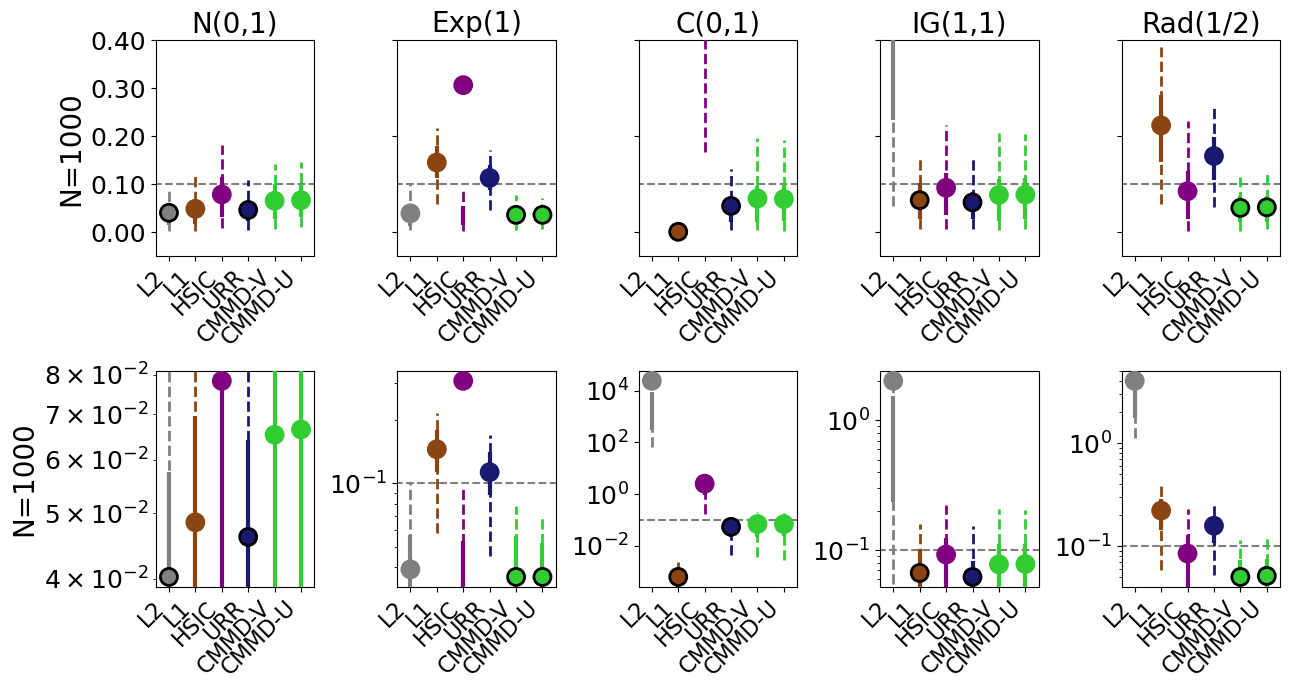

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import copy
from matplotlib.ticker import FormatStrFormatter
from matplotlib import rcParams, rc_file_defaults

# Configuration
ylabelsize = 18
xlabelsize = 16
rc_file_defaults()
rcParams['xtick.labelsize'] = xlabelsize
rcParams['ytick.labelsize'] = ylabelsize 

# Parameters (Replace with actual data)
model_select = [0, 1, 2, 3, 4, 5]
sample_select = [0, 0]
Dataset_names = [r"N=1000", "N=1000"]
Dist_names = ["N(0,1)", r"Exp(1)", r"C(0,1)", r"IG(1,1)", "Rad(1/2)"]
Colours = ["gray", "saddlebrown", "purple", "midnightblue", "limegreen", "limegreen"]
quantiles = [0.75, 0.95, 0.9]
linestyles = ["-", "--", "--"]
lws = [3, 2, 2]

# Simulated Results for Testing (Replace with your real data)
Model_names = results[0]['names'][:-1]

# Prepare colors for scatter points
colours_best = Colours

# Create the figure
fig, axs = plt.subplots(nrows=len(sample_select), ncols=5, figsize=(13, 7))

# Loop through rows and columns of the grid
for i in range(len(sample_select)):
    for k in range(5):  # 5 distributions
        axs[i, k].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        axs[i, k].set_xticks(range(1, len(model_select) + 1))
        axs[i, k].set_xlim(0.5, len(model_select) + 0.5)
        axs[1, k].set_yscale("log")
        
        # Extract mean and percentiles for the current sample and distribution
        means = MAE[sample_select[i], model_select, k].mean(-1).numpy()
        if k == 0:
            axs[i, k].set_ylabel(Dataset_names[i], fontsize=20)
            if i ==0:
                axs[i, k].set_yticks(np.linspace(0, 0.5, 6))  # Adjust y-ticks
        else:
            if i ==0:
                axs[i, k].set_yticklabels([])

        if i == 0:
            axs[i, k].set_title(Dist_names[k], fontsize=20)

        # Diagonal x-axis labels for models
        axs[i, k].set_xticklabels(Model_names, rotation=45, ha='right')

        # Highlight best-performing models
        cols_best = copy.deepcopy(colours_best)
        sorted_means = np.sort(means)
        best_two = [np.where(means == sorted_means[j])[0][0] for j in range(2)]
        for c in range(len(best_two)):
            cols_best[best_two[c]] = "black"

        # Scatter plot of means
        axs[i, k].scatter(range(1, len(model_select) + 1), means, color=Colours, s=150, zorder=12, 
                          edgecolors=cols_best, lw=2)

        # Plot percentile bars
        for j in range(2):
            upper = np.quantile(MAE[sample_select[i], model_select, k].numpy(), quantiles[j], axis=-1)
            lower = np.quantile(MAE[sample_select[i], model_select, k].numpy(), 1 - quantiles[j], axis=-1)
            axs[i, k].vlines(range(1, len(model_select) + 1), lower, upper, color=Colours, 
                             linestyle=linestyles[j], lw=lws[j], zorder=10 - 3 * j)
        
        # Dashed threshold lines (optional)
        threshold = 0.1 if sample_select[i] == 0 else 0.05
        axs[i, k].hlines(threshold, 0, len(model_select) + 1, color="grey", linestyle="dashed")

        # Adjust y-axis limits
        if i ==0:
            axs[i, k].set_ylim(-0.05,0.4)
        #axs[i, 0].set_ylim(1e-2, 10)

# Adjust layout and save the plot
fig.tight_layout()
fig.savefig("Reg_experiments_violin_plot_rotated", bbox_inches="tight")
plt.show()

/tmp/ipykernel_3527934/2211010741.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


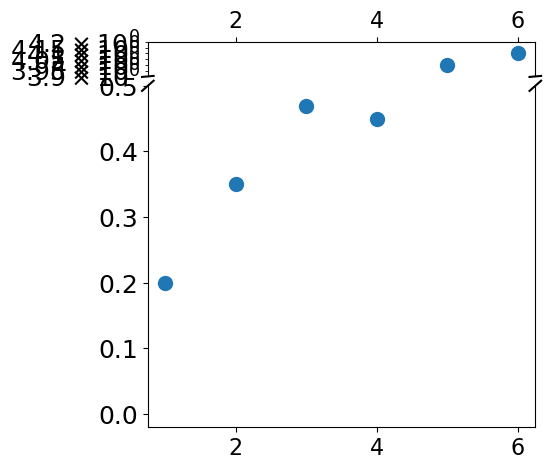

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Example data:
x = np.arange(1, 7)
y = np.array([0.2, 0.35, 0.47, 0.45, 4.0, 4.1])

fig = plt.figure(figsize=(5,5))

# Create two subplots, stacked vertically, sharing the same x-axis
# We'll keep a small vertical space (hspace)
gs = fig.add_gridspec(nrows=2, height_ratios=[1, 10], hspace=0.05)
ax_top = fig.add_subplot(gs[0])
ax_bottom = fig.add_subplot(gs[1], sharex=ax_top)

#----------------------------
# Bottom axis: show [0, 0.5]
#----------------------------
ax_bottom.scatter(x, y, s=100)
ax_bottom.set_ylim(-0.02, 0.5)  # same as your original lower range

# We'll hide the upper spines of ax_bottom to prepare for the break mark
ax_bottom.spines['top'].set_visible(False)
ax_bottom.xaxis.tick_bottom()
ax_bottom.tick_params(labeltop=False)  # no top labels

#----------------------------
# Top axis: show [3.9, 4.2]
#----------------------------
#ax_top.set_yscale("log")
ax_top.scatter(x, y, s=100)
ax_top.set_ylim(3.9, 4.2)  # adjust as needed around the "worst" mean
ax_top.spines['bottom'].set_visible(False)
ax_top.xaxis.tick_top()
ax_top.tick_params(labelbottom=False)  # no bottom labels

#----------------------------
# Draw diagonal lines to show the break in the axis
#----------------------------
d = .015  # diagonal line size, can tweak

# Diagonal lines in the top axis's lower-left corner
ax_top.plot(
    (-d, +d), (-d, +d),
    transform=ax_top.transAxes, color='k', clip_on=False
)
ax_top.plot(
    (1 - d, 1 + d), (-d, +d),
    transform=ax_top.transAxes, color='k', clip_on=False
)

# Diagonal lines in the bottom axis's upper-left corner
ax_bottom.plot(
    (-d, +d), (1 - d, 1 + d),
    transform=ax_bottom.transAxes, color='k', clip_on=False
)
ax_bottom.plot(
    (1 - d, 1 + d), (1 - d, 1 + d),
    transform=ax_bottom.transAxes, color='k', clip_on=False
)

# Finally, show
plt.tight_layout()
plt.show()

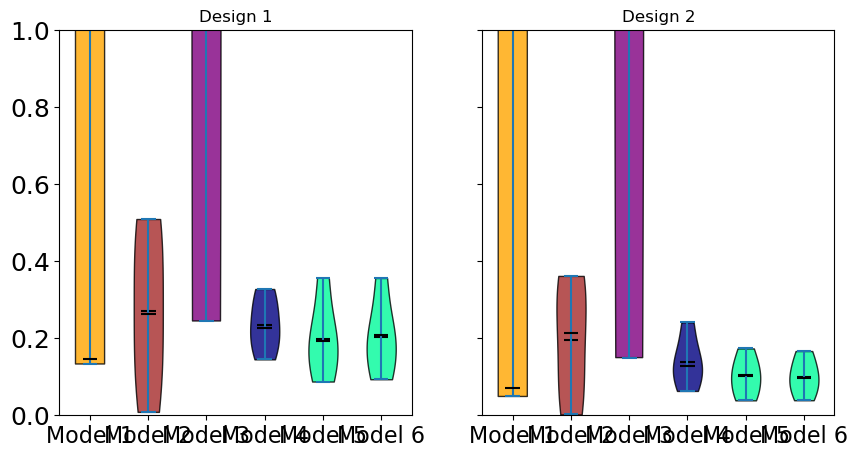

In [44]:
Data = MAE.max(3)[0]  # Shape (N, M, T) where M=6

# Parameters
N, M, T = Data.shape
Colours = ["orange", "brown", "purple", "navy", "mediumspringgreen", "mediumspringgreen"]

# Use only M-1 models (exclude the last one)
Data = Data[:, :-1, :]  # New shape (N, M-1, T)
Colours = Colours       # Exclude the color for the last model
M -= 1                        # Update M to reflect the new count

# Create a figure for the violin plots
fig, axes = plt.subplots(1, N, figsize=(N * 5, 5), sharey=True)

# Ensure axes is iterable even for a single subplot
if N == 1:
    axes = [axes]

# Generate a violin plot for each experiment design (N = 2)
for i in range(N):
    ax = axes[i]
    data = [Data[i, j, :] for j in range(M)]  # Extract data for each model
    parts = ax.violinplot(data, showmeans=True, showmedians=True)
    
    # Customize the colors of each violin
    for j, pc in enumerate(parts['bodies']):
        pc.set_facecolor(Colours[j])
        pc.set_edgecolor('black')
        pc.set_alpha(0.8)
    
    # Customize mean and median lines
    for key in ['cmeans', 'cmedians']:
        if key in parts:
            parts[key].set_color('black')

    # Add labels and titles
    ax.set_title(f'Design {i+1}')
    ax.set_xticks(range(1, M + 1))
    ax.set_xticklabels([f'Model {j+1}' for j in range(M)])
    ax.set_ylim(0,1)